# Datetime variables
This example is based on the examples posted on GitHub for [Feature Engineering for Machine Learning Course](https://github.com/solegalli/feature-engineering-for-machine-learning)

Datetime variables take dates and / or time as values. For example, date of birth ('29-08-1987'). Datetime variables can contain dates only, times only, or dates and time. Before using in machine learning we often extract values from datetime variables e.g., year and month.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Let's load the dataset.
df = pd.read_csv('./datasets/loan.csv')
df.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [4]:
# Pandas assigns type 'object' to dates when loading from csv.
# Let's have a look:
df[['date_issued', 'date_last_payment']].dtypes

date_issued          str
date_last_payment    str
dtype: object

Both **date_issued** and **date_last_payment** are cast as objects. We need to change their data type to datetime.

In [5]:
# Let's parse the dates into datetime format.
# This will allow us to make some analysis afterwards.

df['date_issued_dt'] = pd.to_datetime(df['date_issued'])
df['date_last_payment_dt'] = pd.to_datetime(df['date_last_payment'])

df[['date_issued', 'date_issued_dt', 'date_last_payment', 'date_last_payment_dt']].head(3)
df[['date_issued', 'date_issued_dt', 'date_last_payment', 'date_last_payment_dt']].dtypes

date_issued                        str
date_issued_dt          datetime64[us]
date_last_payment                  str
date_last_payment_dt    datetime64[us]
dtype: object

In [6]:
# Let's extract the month and the year from the 
# datetime variable to make plots.
df['month'] = df['date_issued_dt'].dt.month
df['year'] = df['date_issued_dt'].dt.year

**unstack(): pivot from rows to columns**

<img src="./images/unstack.png" alt="unstack illustration" style="width:500px;height:auto;">

year  month  risk_band
2007  7      A               1820.00
      8      E              18600.00
      9      E              19432.25
      10     E              14256.00
      12     B               2796.50
                             ...    
2015  12     A            1094781.50
             B            1775188.00
             C            1941545.75
             D            1083162.50
             E             871467.50
Name: loan_amount, Length: 415, dtype: float64

risk_band            A           B           C           D           E
year month                                                            
2007 7         1820.00         NaN         NaN         NaN         NaN
     8             NaN         NaN         NaN         NaN    18600.00
     9             NaN         NaN         NaN         NaN    19432.25
     10            NaN         NaN         NaN         NaN    14256.00
     12            NaN     2796.50         NaN         NaN         NaN
...                ...         ...         ...         ...         ...
2015 8      1149909.75  1536688.75  1491727.50   880038.75   852688.00
     9       757929.75  1287596.50  1386275.50   879593.25   686892.25
     10      971295.50  2361789.00  2243754.50  1080193.75  1112724.25
     11      998115.50  1679571.50  2017138.00   858076.25   542300.00
     12     1094781.50  1775188.00  1941545.75  1083162.50   871467.50

[99 rows x 5 columns]

Text(0, 0.5, 'Loan Amount')

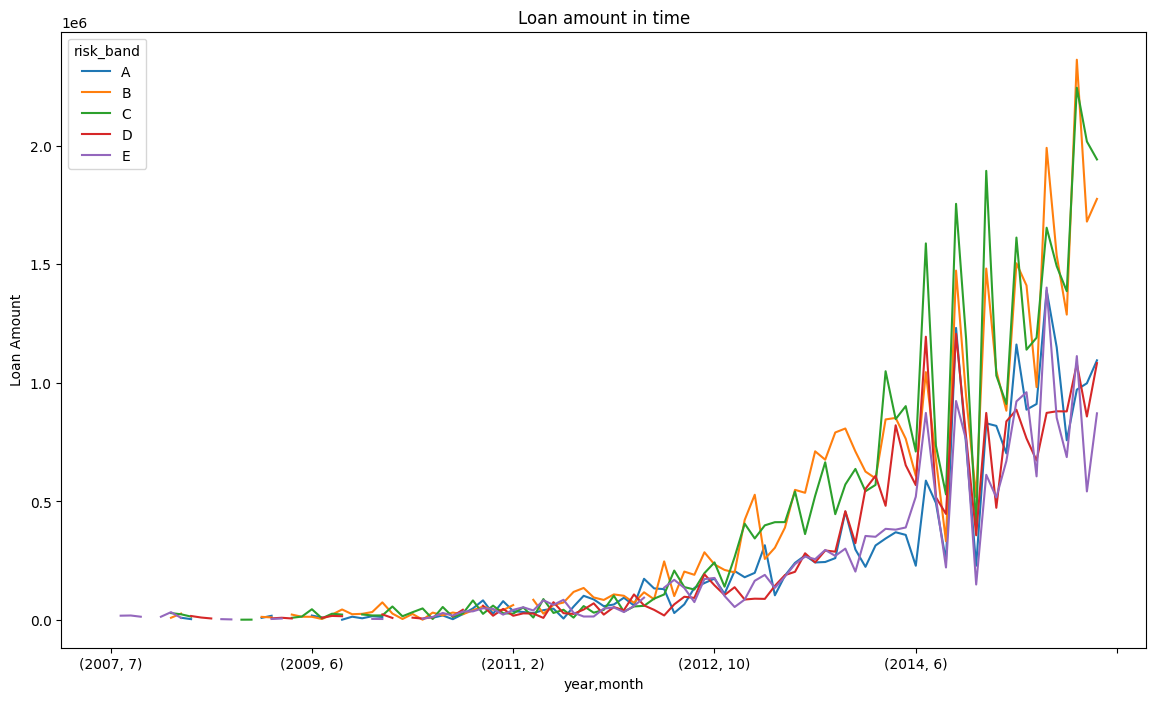

In [7]:
# Let's see how much money has been disbursed
# over the years to the different risk bands
df = df.rename(columns={"market": "risk_band", "disbursed_amount": "loan_amount"})

df2 = df.groupby(['year', 'month', 'risk_band'])['loan_amount'].sum()
display(df2)

df2 = df2.unstack()
display(df2)

fig = df2.plot(figsize=(14, 8))

fig.set_title('Loan amount in time')
fig.set_ylabel('Loan Amount')

This bank seems to have increased the amount of money lent from 2012 onwards. The tendency indicates that they will continue to grow. In addition, we can see that their major business comes from lending money to lowest-risk B and C-grade borrowers.